# Part 1

In [1]:
ls mnist

t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [2]:
import struct
import gzip
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
# from mnist import MNIST # what is the purpose of this line 

In [4]:
#create dictionaries
train = dict()
test = dict()

In [5]:
def get_images (filename):
    with gzip.GzipFile(Path('mnist', filename), 'rb') as f:
         magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
         print(magic, size, rows, cols)
         images = np.frombuffer(f.read(), dtype=np.dtype('B'))
    return images.reshape(size, rows, cols)

In [6]:
def get_labels(filename):
    with gzip.GzipFile(Path('mnist', filename), 'rb') as f:
         magic, num = struct.unpack(">II", f.read(8))
         labels = np.frombuffer(f.read(), dtype=np.dtype('B'))
    return labels

In [7]:
train['image'] = get_images('train-images-idx3-ubyte.gz')
test['image'] = get_images('t10k-images-idx3-ubyte.gz')
print(train['image'].shape, test['image'].shape)

2051 60000 28 28
2051 10000 28 28
(60000, 28, 28) (10000, 28, 28)


In [8]:
train['label'] = get_labels('train-labels-idx1-ubyte.gz')
test['label'] = get_labels('t10k-labels-idx1-ubyte.gz')
print(train['label'].shape, test['label'].shape)

(60000,) (10000,)


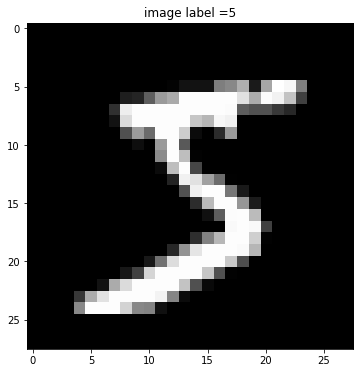

In [9]:
#sanity check that it's loaded in properly
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(train['image'][0], cmap='gray')
ax.set_title('image label ='+ str(train['label'][0]))
plt.show()

## Pick a digit K of interest and separate
- Let K = 2

In [10]:
two = []
not_two = []
for i in range(len(train['label'])):
    if 2 == train['label'][i]:
        two.append(i)
    else:
        not_two.append(i)
print('lenght of two indicies:',len(two))
print('lenght of not two indicies', len(not_two))

lenght of two indicies: 5958
lenght of not two indicies 54042


In [11]:
train['image'][0].flatten().shape

(784,)

In [12]:
two[:10]

[5, 16, 25, 28, 76, 82, 109, 117, 120, 122]

In [13]:
X_two = np.zeros((len(two), 784))
X_not_two = np.zeros((len(not_two), 784))

for i in range(len(two)):
    X_two[i] = train['image'][two[i]].flatten()
    
print(X_two.shape)  # 5958, 784

for i in range(len(not_two)):
    X_not_two[i] = train['image'][not_two[i]].flatten()
    
print(X_not_two.shape)  # 54042, 784

(5958, 784)
(54042, 784)


In [14]:
#add a column of 1's
x_2 = np.hstack((np.ones((len(X_two),1)),X_two))
x_not_2 = np.hstack((np.ones((len(X_not_two),1)),X_not_two))
print('x_2 after adding 1s is:', x_2.shape)
print('x_not_2 after adding 1s is:', x_not_2.shape)

x_2 after adding 1s is: (5958, 785)
x_not_2 after adding 1s is: (54042, 785)


In [15]:
#now let's concatenate x_2 and x_not_2
x=np.concatenate((x_2,x_not_2), axis=0)
print(x.shape)

(60000, 785)


In [16]:
X_two[0].reshape(28,28) == train['image'][two[0]]

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True

In [17]:
#building the matrix y
y_two = [1 for i in range(len(two))]
y_not_two = [-1 for i in range(len(not_two))]
print(len(y_two), len(y_not_two))

#concatenating y_two and y_not_two
y=np.concatenate((y_two,y_not_two), axis=0)
print(y.shape)

5958 54042
(60000,)


In [18]:
#import train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

In [23]:
#display beta
beta = np.linalg.pinv(x.T@x)@(x.T@y)
beta

array([-9.00343051e-01, -1.06157658e-08,  3.17094758e-11,  3.21460931e-10,
        4.13212941e-10, -4.80600683e-11, -5.68895819e-10,  5.29446167e-10,
       -3.43166574e-09, -3.09282235e-10, -1.31798941e-10, -7.65565761e-10,
        3.07635613e-10, -1.64922190e-03,  5.12984021e-04,  4.58945455e-03,
        1.91227762e-04,  1.71636863e-09, -3.36820896e-11,  1.42266375e-09,
        1.36080337e-09, -7.31129976e-10, -1.16324251e-09,  9.76537749e-10,
       -9.99447293e-11,  9.05854447e-10,  3.21073875e-10, -1.26928048e-09,
       -4.68366551e-10,  5.21884720e-10,  8.65862448e-10, -1.44607915e-09,
       -1.18463130e-09, -5.86567066e-02,  2.24318791e-02, -2.62022400e-03,
       -4.28776637e-04, -2.44911155e-04, -1.15128734e-03, -5.12409162e-04,
       -6.81368993e-05, -5.40226553e-04, -7.94714812e-04,  3.27298633e-04,
       -1.17616056e-03,  1.73438441e-03, -1.02846693e-03, -2.30108587e-05,
       -5.33480094e-04, -7.86079727e-05, -1.73892972e-04,  4.38105962e-05,
       -1.14350449e-03, -

In [145]:
beta.shape

(785,)

### Linear regression on the training set

In [21]:
#apply linear regression on the training set to predict y_train
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_train_pred = linearRegressor.predict(x_train)
y_train_pred = np.sign(y_train_pred)
y_train_pred

array([-1., -1., -1., ..., -1., -1., -1.])

### Regression Metrics of the training set

In [22]:
#evaluate the performance of the linear regression model of the training set 
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_train, y_train_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_train, y_train_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_train, y_train_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_train, y_train_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_train, y_train_pred), 2))

Mean absolute error = 0.07
Mean squared error = 0.15
Median absolute error = 0.0
Explain variance score = 0.6
R2 score = 0.59


### classification error rate of the training set

In [23]:
#classification report
from sklearn.metrics import classification_report
report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.96      1.00      0.98     27047
           1       0.95      0.66      0.78      2953

    accuracy                           0.96     30000
   macro avg       0.96      0.83      0.88     30000
weighted avg       0.96      0.96      0.96     30000



### classification error rate of the training set

In [24]:
#classification error rate. accuracy rate is obtained from the classification report
accuracy = 0.96
classification_error_rate = 1 - accuracy
classification_error_rate

0.040000000000000036

### Confusion matrix of the training set

In [25]:
# Confusion matrix

from sklearn import metrics
print(metrics.confusion_matrix(y_train, y_train_pred))

[[26942   105]
 [  995  1958]]


### Linear regression on the test set

In [26]:
#apply linear regression on the test set to predict y_test
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(x_test, y_test)
y_test_pred = linearRegressor.predict(x_train)
y_test_pred = np.sign(y_train_pred)
y_test_pred

array([-1., -1., -1., ..., -1., -1., -1.])

### Regression Metrics of the test set

In [27]:
#evaluate the performance of the linear regression model of the test set 
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 0.31
Mean squared error = 0.62
Median absolute error = 0.0
Explain variance score = -0.71
R2 score = -0.72


### classification_report of the test set

In [28]:
#classification_report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.90      0.93      0.92     26995
           1       0.10      0.07      0.08      3005

    accuracy                           0.85     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.82      0.85      0.83     30000



### classification error rate of the test set

In [29]:
#classification error rate. accuracy rate is obtained from the classification report
accuracy = 0.84
classification_error_rate = 1 - accuracy
classification_error_rate

0.16000000000000003

### Confusion matrix of the test set

In [30]:
# IMPORTANT: first argument is true values, second argument is predicted values

from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_test_pred))

[[25143  1852]
 [ 2794   211]]


### Reduce the number of parameters in the beta using backward selection methods.

Backward Elimination consists of the following steps:     

 a- Select a significance level to stay in the model (eg. SL = 0.05)    
 b- Fit the model with all possible predictors   
 c- Consider the predictor with the highest P-value. If P>SL, go to point d.   
 d- Remove the predictor    
 e- Fit the model without this variable and repeat the step c until the condition becomes false.    

In [31]:
# choose a Significance level usually 0.05, if p>0.05
import statsmodels.regression.linear_model as sm 
model  = sm.OLS(y, x)
results = model.fit()
results.summary()

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     118.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:03:22   Log-Likelihood:                -27829.
No. Observations:               60000   AIC:                         5.708e+04
Df Residuals:                   59287   BIC:                         6.350e+04
Df Model:                         712                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9003      0.007   -131.169      0.000      -0.914      -0.887
x1         -4.138e-13   1.06e-13     -3.919      0.000   -6.21e-13   -2.07e-13
x2         -1.929e-13   9.91e-14     -1.946      0.052   -3.87e-13    1.39e-15
x3         -4.702e-15   1.11e-13     -0.042      0.966   -2.23e-13    2.14e-13
x4          7.428e-14   2.51e-13      0.296      0.767   -4.18e-13    5.67e-13
x5          3.942e-14   1.39e-13      0.283      0.777   -2.34e-13    3.12e-13
x6          3.501e-14   2.72e-15     12.872      0.000    2.97e-14    4.03e-14
x7          8.509e-15   2.39e-14      0.356      0.722   -3.83e-14    5.53e-14
x8         -2.014e-14   1.03e-13     -0.196      0.844   -2.21e-13    1.81e-13
x9          2.928e-14   2.73e-14      1.074      0.283   -2.41e-14    8.27e-14
x10        -2.453e-14   1.51e-13     -0.162      0.871   -3.21e-13    2.72e-13
x11         3.689e-14   7.08e-14      0.521      0.602   -1.02e-13    1.76e-13
x12        -1.706e-14   2.82e-14     -0.604      0.546   -7.24e-14    3.83e-14
x13           -0.0016      0.001     -1.470      0.142      -0.004       0.001
x14            0.0005      0.001      0.451      0.652      -0.002       0.003
x15            0.0046      0.002      2.319      0.020       0.001       0.008
x16            0.0002   8.24e-05      2.319      0.020    2.96e-05       0.000
x17        -1.251e-14   3.86e-14     -0.324      0.746   -8.82e-14    6.32e-14
x18        -9.019e-15   6.11e-14     -0.148      0.883   -1.29e-13    1.11e-13
x19         6.959e-15   1.68e-14      0.414      0.679    -2.6e-14    3.99e-14
x20        -3.468e-14   1.28e-13     -0.272      0.786   -2.85e-13    2.15e-13
x21        -9.385e-15   5.46e-15     -1.720      0.086   -2.01e-14    1.31e-15
x22         5.105e-15   1.26e-14      0.406      0.684   -1.95e-14    2.97e-14
x23         5.711e-15   5.51e-15      1.036      0.300    -5.1e-15    1.65e-14
x24         2.372e-14   7.84e-14      0.302      0.762    -1.3e-13    1.77e-13
x25           3.2e-14   1.11e-13      0.287      0.774   -1.86e-13     2.5e-13
x26        -3.398e-15   3.17e-15     -1.071      0.284   -9.62e-15    2.82e-15
x27        -3.684e-14   1.32e-13     -0.279      0.780   -2.96e-13    2.22e-13
x28         9.448e-17   1.41e-14      0.007      0.995   -2.75e-14    2.77e-14
x29         8.593e-15   3.44e-14      0.250      0.803   -5.89e-14    7.61e-14
x30        -1.703e-14   5.88e-14     -0.290      0.772   -1.32e-13    9.82e-14
x31         2.614e-15   9.85e-15      0.265      0.791   -1.67e-14    2.19e-14
x32        -2.454e-14   8.56e-14     -0.287      0.774   -1.92e-13    1.43e-13
x33           -0.0587      0.207     -0.284      0.777      -0.464       0.346
x34            0.0224      0.070      0.320      0.749      -0.115       0.160
x35           -0.0026      0.004     -0.584      0.559      -0.011       0.006
x3

- xelimination is created. (ie: xelimination = X[:,[0,1,2,3,4,5]] ) The first “:” means that it is going to include all of the rows, and then the barack after the commas indicate the column index that it includes. This way, we can remove a column ( or remove an independent variable easily)
For example, if we want to remove the second column ( column index =1) now, then we are going to write xelimination = X[:,[0, 2,3,4,5]].    

- regressorOLS = sm.OLS(y, xelimination).fit() ; is going to fit the Multivariate Linear Regression. Beware to indicate the y variable and the x variable correctly.     

- regressorOLS.summary() ; this is going to show you the p value in the regression !
if regressorOLS.summary() does not work, then try print(regressorOLS.summary()).     

- OLS here stands for “Ordinary Least Square”.


In [32]:
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as sm 
model  = sm.OLS(y, x)
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
x_opt = x[:, [0,1,2,3,4,5]]
x_reduced = backwardElimination(x_opt, SL)
x_reduced

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

import statsmodels.formula.api as sm
xelimination = X[:,[0,1,2,3,4,5]]
regressorOLS = sm.OLS(y, xelimination).fit()
regressorOLS.summary()
xelimination = X[:,[0,1,3,4,5]]
regressorOLS = sm.OLS(y, xelimination).fit()
regressorOLS.summary()
xelimination = X[:,[0,3,4,5]]
regressorOLS = sm.OLS(y, xelimination).fit()
regressorOLS.summary()
xelimination = X[:,[0,3,5]]
regressorOLS = sm.OLS(y, xelimination).fit()
regressorOLS.summary()
xelimination = X[:,[0,3]]
regressorOLS = sm.OLS(y, xelimination).fit()
regressorOLS.summary()

In [33]:
#display beta for the reduce model
beta_reduced = np.linalg.pinv(x_reduced.T@x_reduced)@(x_reduced.T@y)
beta_reduced

array([-0.8014,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ])

In [34]:
#size of the initial beta
beta.shape

(785,)

In [35]:
#size of the reduced beta
beta_reduced.shape

(6,)

In [36]:
#size of the initial x
x_train.shape

(30000, 785)

In [37]:
#size of the reduced x
x_reduced.shape

(60000, 6)

In [38]:
#import train test split using the reduced model
from sklearn.model_selection import train_test_split
x_red_train, x_red_test, y_red_train, y_red_test = train_test_split(x_reduced, y, test_size = 0.5, random_state = 42)

In [39]:
#apply linear regression on the training set to predict y_train using the reduced model
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(x_red_train, y_red_train)
y_train_pred = linearRegressor.predict(x_red_train)
y_red_train_pred = np.sign(y_red_train)
y_red_train_pred

array([-1, -1, -1, ...,  1, -1, -1])

In [40]:
#y_predict using the initial model
y_train_pred.shape

(30000,)

In [41]:
#y_predict using the reduced model
y_red_train_pred.shape

(30000,)

In [42]:
x_red_train.shape

(30000, 6)

In [43]:
x_red_train[ : , 0].shape

(30000,)

### Residuals vs Fitted

In [47]:
# generate OLS model
model = sm.OLS(y,x)
model_fit = model.fit()


In [46]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


/opt/tljh/user/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


Text(0.5, 1.0, 'Residual plot')

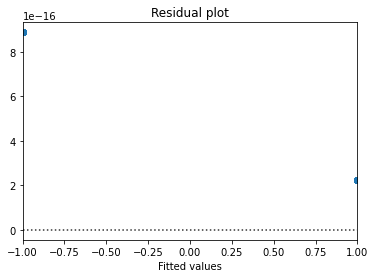

In [47]:
import seaborn as sns
sns.residplot(y_red_train_pred, x_red_train[ : , 0],lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

### Normal Q-Q

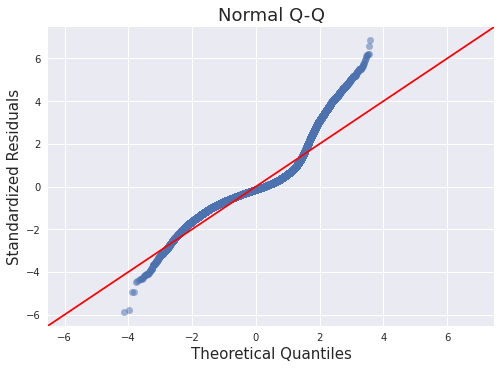

In [48]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

### Scale-Location

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


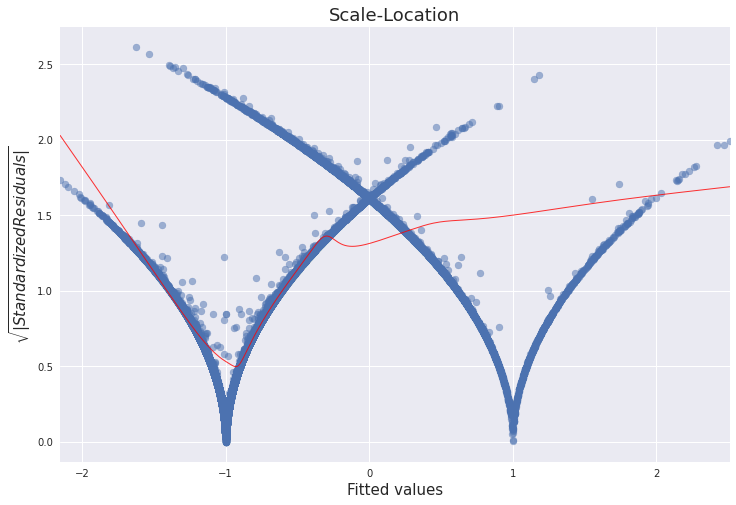

In [49]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

### Residuals vs Leverage

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


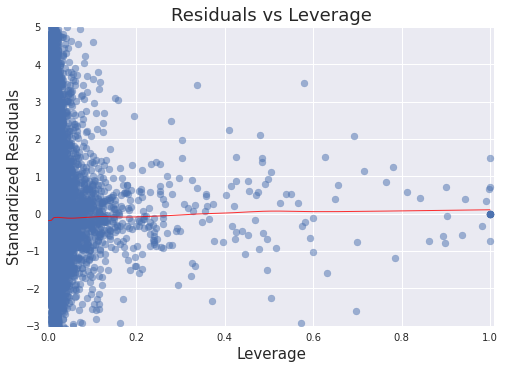

In [50]:
model_fit = model.fit()
model_cooks = model_fit.get_influence().cooks_distance[0]
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
model = sm.OLS(y, x_reduced)

#Residuals vs Leverage
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
  plot_lm_4.axes[0].annotate(i,
                             xy=(model_leverage[i],
                                 model_norm_residuals[i]));

# Part 2

### Pick deux digits K and l of interest 
Let K = 7 and l = 9

In [48]:
seven = []
not_seven = []
for i in range(len(train['label'])):
    if 7 == train['label'][i]:
        seven.append(i)
    else:
        not_seven.append(i)
print('lenght of seven indicies:',len(seven))
print('lenght of not seven indicies', len(not_seven))

lenght of seven indicies: 6265
lenght of not seven indicies 53735


In [49]:
nine = []
not_nine = []
for i in range(len(train['label'])):
    if 9 == train['label'][i]:
        nine.append(i)
    else:
        not_nine.append(i)
print('lenght of nine indicies:',len(nine))
print('lenght of not nine indicies', len(not_nine))

lenght of nine indicies: 5949
lenght of not nine indicies 54051


In [50]:
train['image'][0].flatten().shape

(784,)

In [51]:
X_seven = np.zeros((len(seven), 784))
X_not_seven = np.zeros((len(not_seven), 784))

for i in range(len(seven)):
    X_seven[i] = train['image'][seven[i]].flatten()
    
print(X_seven.shape)  # 6265, 784

for i in range(len(not_seven)):
    X_not_seven[i] = train['image'][not_seven[i]].flatten()
    
print(X_not_seven.shape)  # 53735, 784

(6265, 784)
(53735, 784)


In [52]:
X_nine = np.zeros((len(nine), 784))
X_not_nine = np.zeros((len(not_nine), 784))

for i in range(len(nine)):
    X_nine[i] = train['image'][nine[i]].flatten()
    
print(X_nine.shape)  # 5949, 784

for i in range(len(not_nine)):
    X_not_nine[i] = train['image'][not_nine[i]].flatten()
    
print(X_not_nine.shape)  # 54051, 784

(5949, 784)
(54051, 784)


In [53]:
#create a pair of 7 and 9 digits
x_seven_nine = np.vstack([X_seven, X_nine])

#create a pair of not 7 and not 9 digits
x_not_seven_not_nine = np.vstack([X_not_seven, X_not_nine])

In [54]:
#add a column of 1's
x_7_9 = np.hstack((np.ones((len(x_seven_nine),1)),x_seven_nine))
x_not_7_not_9 = np.hstack((np.ones((len(x_not_seven_not_nine),1)),x_not_seven_not_nine))
print('x_7_9 after adding 1s is:', x_7_9.shape)
print('x_not7_not_2 after adding 1s is:', x_not_7_not_9.shape)

x_7_9 after adding 1s is: (12214, 785)
x_not7_not_2 after adding 1s is: (107786, 785)


In [55]:
#now let's concatenate x_7_9 and x_not_7_not_9
x79=np.concatenate((x_7_9,x_not_7_not_9), axis=0)
print(x.shape)

(60000, 785)


In [56]:
#building the matrix y
y_seven_nine = [1 for i in range(len(x_seven_nine))]
y_not7_not9 = [-1 for i in range(len(x_not_seven_not_nine))]
print(len(y_seven_nine), len(y_not7_not9))

#concatenating y_two and y_not_two
y79=np.concatenate((y_seven_nine,y_not7_not9), axis=0)
print(y.shape)

12214 107786
(60000,)


In [57]:
#import train test split
from sklearn.model_selection import train_test_split
x79_train, x79_test, y79_train, y79_test = train_test_split(x79, y79, test_size = 0.5, random_state = 42)

In [58]:
#display beta
beta79 = np.linalg.pinv(x79.T@x79)@(x79.T@y79)
beta79

array([-8.12947321e-01, -9.55715150e-09,  4.50449239e-10,  1.53142038e-10,
        7.85296287e-10, -3.84182465e-10, -2.65849340e-10, -3.48450907e-10,
       -1.83135657e-09,  8.54846465e-10,  1.25892832e-09, -6.59165653e-10,
        6.99255198e-10, -4.56129532e-05, -2.20250512e-04, -1.33952685e-04,
       -5.58110387e-06,  3.20496801e-10, -6.00686152e-11,  8.85261680e-10,
        1.82956063e-09,  1.42491196e-10, -1.13289963e-09,  8.13338385e-10,
        5.09571700e-10,  6.10670806e-10,  1.08729469e-10,  1.30161147e-11,
       -4.00990819e-10, -7.18922694e-11, -2.62948493e-10, -1.43974476e-09,
       -1.15689450e-09,  2.82752728e-02, -8.95172322e-03, -1.09331171e-05,
       -5.46436876e-04,  1.22835160e-04, -1.87943189e-04, -3.68620757e-06,
       -2.77074900e-05, -3.73249967e-04,  1.20614014e-04, -8.69087355e-05,
       -5.50347468e-05, -2.00067930e-04, -5.64740929e-05, -4.83865013e-05,
       -1.92161629e-04,  2.29538763e-04, -1.92136286e-04,  2.52290069e-06,
       -3.22214217e-04,  

In [59]:
beta79.shape

(785,)

### Linear regression on the training set

In [ ]:
#apply linear regression on the training set to predict y_train
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(x79_train, y79_train)
y79_train_pred = linearRegressor.predict(x79_train)
y79_train_pred = np.sign(y79_train_pred)
y79_train_pred

### classification report of the training set

In [ ]:
#classification report
from sklearn.metrics import classification_report
report = classification_report(y79_train, y79_train_pred)
print(report)

### classification error rate of the training set

In [68]:
#classification error rate. accuracy rate is obtained from the classification report
accuracy79 = 0.90
classification_error_rate79 = 1 - accuracy79
classification_error_rate79

0.09999999999999998

### Confusion matrix of the training set

In [69]:
# IMPORTANT: first argument is true values, second argument is predicted values

from sklearn import metrics
print(metrics.confusion_matrix(y79_train, y79_train_pred))

[[52612  1202]
 [ 4924  1262]]


### Linear regression on the test set

In [70]:
#apply linear regression on the test set to predict y_test
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(x79_test, y79_test)
y79_test_pred = linearRegressor.predict(x79_train)
y79_test_pred = np.sign(y79_train_pred)
y79_test_pred

array([-1., -1., -1., ..., -1., -1., -1.])

### classification report of the test set

In [71]:
#classification report
from sklearn.metrics import classification_report
report79 = classification_report(y79_test, y79_test_pred)
print(report79)

              precision    recall  f1-score   support

          -1       0.90      0.96      0.93     53972
           1       0.09      0.04      0.05      6028

    accuracy                           0.87     60000
   macro avg       0.50      0.50      0.49     60000
weighted avg       0.82      0.87      0.84     60000



### classification error rate of the training set

In [72]:
#classification error rate. accuracy rate is obtained from the classification report
accuracy79 = 0.87 
classification_error_rate79 = 1 - accuracy79
classification_error_rate79

0.13

### Confusion matrix of the training set

In [73]:
# IMPORTANT: first argument is true values, second argument is predicted values

from sklearn import metrics
print(metrics.confusion_matrix(y79_test, y79_test_pred))

[[51739  2233]
 [ 5797   231]]


### Part 3

In [74]:
train['image'] = get_images('train-images-idx3-ubyte.gz')
test['image'] 

2051 60000 28 28


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [75]:
# let's print the shape before we reshape and normalize
print("train_image shape", train['image'].shape)
print("train_label shape", train['label'].shape)
print("test_image shape",  test['image'].shape)
print("test_label shape", test['label'].shape)

# building the input vector from the 28x28 pixels
train['image'] = train['image'].reshape(60000, 784)
test['image'] = test['image'].reshape(10000, 784)
train['image'] = train['image'].astype('float32')
test['image'] = test['image'].astype('float32')

# normalizing the data to help with the training
train['image'] /= 255
test['image'] /= 255

# print the final input shape ready for training
print("Train matrix shape", train['image'].shape)
print("Test matrix shape", test['image'].shape)

train_image shape (60000, 28, 28)
train_label shape (60000,)
test_image shape (10000, 28, 28)
test_label shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [76]:
#Import the model you want to use
from sklearn.linear_model import LogisticRegression
#Make an instance of the Model
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [77]:
#Training the model on the data, storing the information learned from the data
#Model is learning the relationship between digits and labels
logisticRegr.fit(train['image'], train['label'])

/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [78]:
# Predict the labels of new data (new images)

# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test['image'][0].reshape(1,-1))

array([7], dtype=uint8)

In [79]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test['image'][0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [80]:
#shape
logisticRegr.coef_.shape

(10, 784)

In [81]:
# prints weights for 8x8 image for class 0
logisticRegr.coef_[0].round(2)

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  , -0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  , -0.  ,
       -0.  , -0.  , -0.  ,  0.04,  0.09,  0.04, -0.  ,  0.03,  0.09,
        0.04, -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.01,  0.  , -0.  , -0.04,
       -0.05, -0.04, -0.04, -0.03, -0.05, -0.06, -0.12, -0.19, -0.21,
       -0.16, -0.14, -0.09, -0.06, -0.05, -0.02, -0.01, -0.  , -0.  ,
       -0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.01, -0.01, -0.1 ,
       -0.14, -0.17, -0.03, -0.08, -0.02,  0.04, -0.01,  0.24,  0.32,
        0.22,  0.24,  0.18, -0.15, -0.22, -0.17, -0.27, -0.18, -0.08,
       -0.03, -0.01, -0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  , -0.02,
       -0.15, -0.17, -0.05,  0.05,  0.19,  0.1 ,  0.34,  0.03,  0.22,
        0.01,  0.17,

In [82]:
# Make predictions on entire test data
predictions = logisticRegr.predict(test['image'])

In [83]:
#Train score
#accuracy is defined as:(fraction of correct predictions): correct predictions / total number of data points
score = logisticRegr.score(train['image'], train['label'])
print(score)

0.9346166666666667


In [84]:
#Test score
#accuracy is defined as:(fraction of correct predictions): correct predictions / total number of data points
score = logisticRegr.score(test['image'], test['label'])
print(score)

0.9256


In [85]:
#Confusion Matrix
from sklearn import metrics
import seaborn as sns

cm = metrics.confusion_matrix(test['label'], predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized

array([[9.78571429e-01, 0.00000000e+00, 0.00000000e+00, 3.06122449e-03,
        1.02040816e-03, 7.14285714e-03, 5.10204082e-03, 4.08163265e-03,
        1.02040816e-03, 0.00000000e+00],
       [0.00000000e+00, 9.79735683e-01, 3.52422907e-03, 1.76211454e-03,
        0.00000000e+00, 1.76211454e-03, 2.64317181e-03, 1.76211454e-03,
        8.81057269e-03, 0.00000000e+00],
       [5.81395349e-03, 8.72093023e-03, 8.99224806e-01, 1.55038760e-02,
        7.75193798e-03, 3.87596899e-03, 1.45348837e-02, 6.78294574e-03,
        3.39147287e-02, 3.87596899e-03],
       [3.96039604e-03, 9.90099010e-04, 1.68316832e-02, 9.11881188e-01,
        0.00000000e+00, 2.27722772e-02, 3.96039604e-03, 1.08910891e-02,
        2.27722772e-02, 5.94059406e-03],
       [1.01832994e-03, 1.01832994e-03, 7.12830957e-03, 4.07331976e-03,
        9.30753564e-01, 0.00000000e+00, 1.01832994e-02, 4.07331976e-03,
        1.01832994e-02, 3.15682281e-02],
       [1.12107623e-02, 2.24215247e-03, 3.36322870e-03, 4.14798206e-02,
   

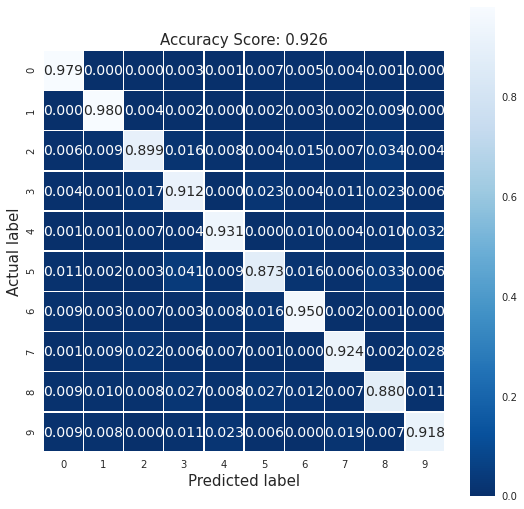

In [86]:
#confusion matrix (as a heatmap) of the entire dataset
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15);

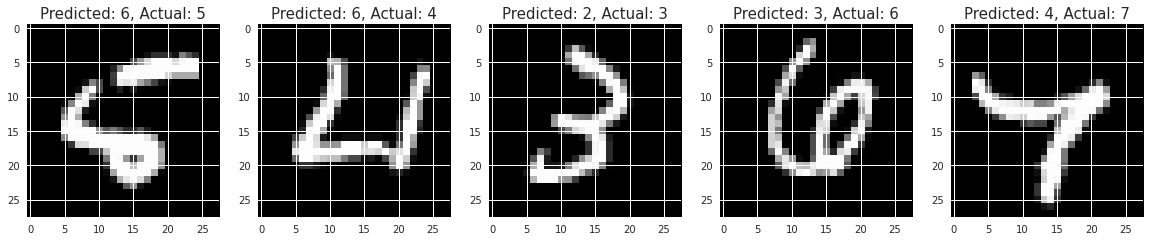

In [87]:
#Display Misclassified images with Predicted Labels to find which images are wrongly classified.
index = 0
misclassifiedIndexes = []
for label, predict in zip(test['label'], predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
#print(misclassifiedIndexes)
plt.figure(figsize=(20,4))
#printthe 5 first misclassified images
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test['image'][badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test['label'][badIndex]), fontsize = 15)

In [88]:
regr = LogisticRegression(solver = 'lbfgs')

/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

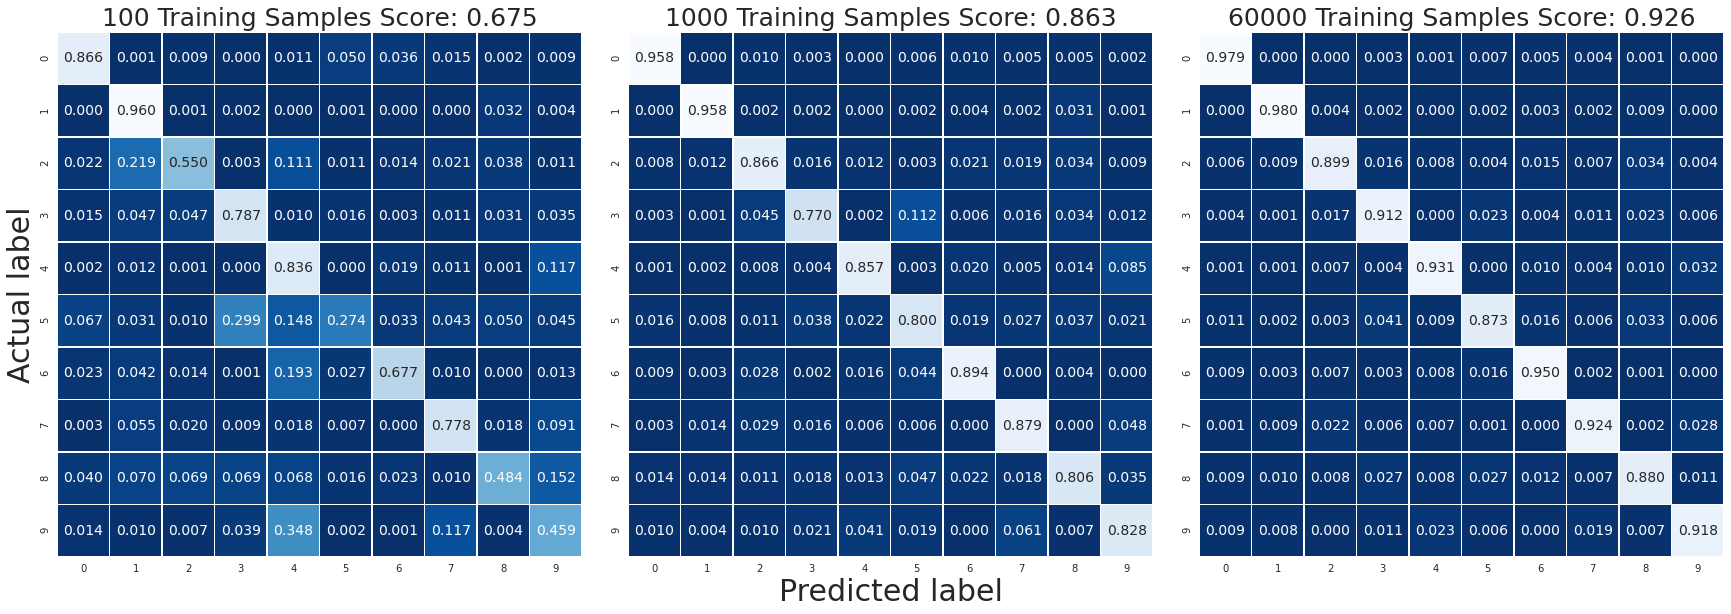

In [89]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (24,8));
plt.tight_layout()

for plotIndex, sample_size in enumerate([100, 1000, 60000]):
    X_train = train['image'][:sample_size].reshape(sample_size, 784)
    y_train = train['label'][:sample_size]
    regr.fit(X_train, y_train)
    predicted = regr.predict(test['image'])
    cm = metrics.confusion_matrix(test['label'], predicted)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax = axes[plotIndex], cbar = False);
    accuracyString = '{:g} Training Samples Score: {:.3f}'.format(sample_size, regr.score(test['image'], test['label'])) 
    axes[plotIndex].set_title(accuracyString, size = 25);

axes[0].set_ylabel('Actual label', fontsize = 30);
axes[1].set_xlabel('Predicted label', fontsize = 30);

### Part 4

In [24]:
%matplotlib notebook
import yellowbrick
import scipy as sp
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

# Note: statsmodels requires scipy 1.2
import statsmodels.formula.api as sm

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import OLSInfluence as influence

from yellowbrick.base import Visualizer

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
f = 'y~x'
model = smf.ols(formula=f, data=x).fit()
print ('R-Squared:', model.rsquared)
print (model.params)
X_new = pd.DataFrame({'x': [df.bedrooms.min(), df.bedrooms.max()]});
preds = model.predict(X_new)
df.plot(kind='scatter', x='x', y='y');
plt.plot(x_new, preds, c='blue', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "x", fig=fig)
plt.show()
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()
from statsmodels.formula.api import ols
infl = model.get_influence()
sm_fr = infl.summary_frame(); 
sm_fr[:10]

ERROR! Session/line number was not unique in database. History logging moved to new session 225


/opt/tljh/user/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/jupyter-vmahi000/.local/lib/python3.7/site-packages/yellowbrick/regressor/influence.py:157: RuntimeWarning: invalid value encountered in sqrt
  residuals_studentized = residuals / np.sqrt(mse) / np.sqrt(1 - leverage)
/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/jupyter-vmahi000/.local/lib/python3.7/site-packages/yellowbrick/regressor/influence.py:169: RuntimeWarning: invalid value encountered in greater
  sum(self.distance_ > self.influence_threshold_) / X.shape[0]
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to Dej

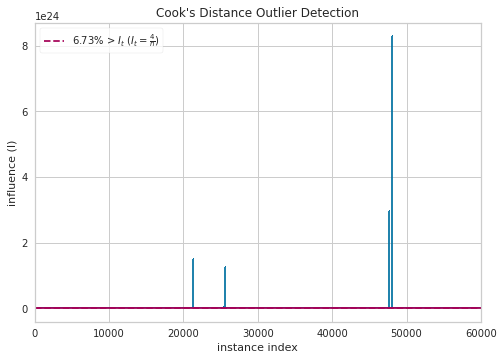

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [46]:
from yellowbrick.regressor import CooksDistance
visualizer = CooksDistance()
visualizer.fit(x, y)
visualizer.show()

# Part 1 without outliers

### Pick a digit K of interest and separate
Let K = 2

In [47]:
x1 = x[0:20000, :]

x2 = x[30000:40000, :]

In [48]:
x_no_outliers1 = np.concatenate((x1,x2),axis=0)

In [49]:
x3 = x[50000:60000, :]

In [50]:
x_no_outliers = np.concatenate((x_no_outliers1,x3),axis=0)

In [53]:
x_no_outliers.shape

(40000, 785)

In [61]:
y1 = y[0:20000, ]
y2 = y[30000:40000, ]
y_no_outliers1 = np.concatenate((y1,y2),axis=0)
y3 = y[50000:60000, ]
y_no_outliers = np.concatenate((y_no_outliers1,y3),axis=0)
y_no_outliers.shape

(40000,)

In [62]:
#import train test split
from sklearn.model_selection import train_test_split
x_train_no_outliers, x_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(x_no_outliers, y_no_outliers, test_size = 0.5, random_state = 42)

In [63]:
#display beta
beta_no_outliers = np.linalg.pinv(x_no_outliers.T@x_no_outliers)@(x_no_outliers.T@y_no_outliers)
beta_no_outliers

array([-8.31325980e-01, -3.23151820e-09, -1.34090872e-09,  3.94135075e-10,
        4.37173685e-10,  4.81963288e-10,  1.12931022e-10,  1.10474708e-09,
       -3.34918779e-10,  5.83034679e-10,  1.30832854e-09,  9.47865696e-10,
        3.48701857e-10, -1.31390759e-03,  5.14603681e-04,  3.77421437e-03,
        1.57259163e-04, -6.34643273e-11,  9.15560762e-11, -6.34822147e-10,
       -8.70502008e-10,  6.86959562e-10,  7.10374950e-10, -3.39219507e-10,
        3.89437362e-10, -4.30659039e-10,  6.73257246e-11, -6.08456140e-10,
        1.15021958e-09,  1.18912245e-09,  1.39108644e-09, -1.41324654e-09,
        2.30270412e-09, -1.53761778e-11,  3.01048208e-02, -3.33481889e-03,
       -3.74147625e-04, -4.61821414e-04, -9.46085591e-04, -9.39646664e-04,
        1.22117272e-04, -7.72919691e-04, -1.17535911e-03,  5.28536695e-04,
       -1.66206902e-03,  2.24708216e-03, -9.96633936e-04, -1.04410882e-04,
       -8.77677117e-04,  1.46984837e-04,  1.00227365e-03, -1.70208475e-03,
        2.33054537e-04, -

In [64]:
beta_no_outliers.shape

(785,)

### Linear regression on the training set

In [65]:
#apply linear regression on the training set to predict y_train
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(x_train_no_outliers, y_train_no_outliers)
y_train_pred_no_outliers = linearRegressor.predict(x_train_no_outliers)
y_train_pred_no_outliers = np.sign(y_train_pred_no_outliers)
y_train_pred_no_outliers

array([-1., -1., -1., ..., -1.,  1., -1.])

#### Regression Metrics of the training set

In [66]:

#evaluate the performance of the linear regression model of the training set 
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_train_no_outliers, y_train_pred_no_outliers), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_train_no_outliers, y_train_pred_no_outliers), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_train_no_outliers, y_train_pred_no_outliers), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_train_no_outliers, y_train_pred_no_outliers), 2)) 
print("R2 score =", round(sm.r2_score(y_train_no_outliers, y_train_pred_no_outliers), 2))



Mean absolute error = 0.09
Mean squared error = 0.18
Median absolute error = 0.0
Explain variance score = 0.66
R2 score = 0.65


#### classification error rate of the training set

In [67]:
#classification report
from sklearn.metrics import classification_report
reportno_outliers = classification_report(y_train_no_outliers, y_train_pred_no_outliers)
print(reportno_outliers)

              precision    recall  f1-score   support

          -1       0.96      0.99      0.97     17023
           1       0.94      0.75      0.83      2977

    accuracy                           0.96     20000
   macro avg       0.95      0.87      0.90     20000
weighted avg       0.96      0.96      0.95     20000



#### classification error rate of the training set

In [68]:
#classification error rate. accuracy rate is obtained from the classification report
accuracy = 0.96
classification_error_rate = 1 - accuracy
classification_error_rate

0.040000000000000036

#### Confusion matrix of the training set

In [69]:
# Confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_train_no_outliers, y_train_pred_no_outliers))

[[16893   130]
 [  751  2226]]


#### Linear regression on the test set

In [70]:
#apply linear regression on the test set to predict y_test
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(x_test_no_outliers, y_test_no_outliers)
y_test_pred_no_outliers = linearRegressor.predict(x_train_no_outliers)
y_test_pred_no_outliers = np.sign(y_train_pred_no_outliers)
y_test_pred_no_outliers

array([-1., -1., -1., ..., -1.,  1., -1.])

#### Regression Metrics of the test set

In [71]:
#evaluate the performance of the linear regression model of the test set 
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_no_outliers, y_test_pred_no_outliers), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test_no_outliers, y_test_pred_no_outliers), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test_no_outliers, y_test_pred_no_outliers), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test_no_outliers, y_test_pred_no_outliers), 2)) 
print("R2 score =", round(sm.r2_score(y_test_no_outliers, y_test_pred_no_outliers), 2))

Mean absolute error = 0.46
Mean squared error = 0.92
Median absolute error = 0.0
Explain variance score = -0.81
R2 score = -0.82


#### classification_report of the test set

In [72]:

#classification_report
from sklearn.metrics import classification_report
report_no_outliers = classification_report(y_test_no_outliers, y_test_pred_no_outliers)
print(report_no_outliers)

              precision    recall  f1-score   support

          -1       0.85      0.88      0.87     17019
           1       0.15      0.12      0.14      2981

    accuracy                           0.77     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.75      0.77      0.76     20000



#### classification error rate of the test set

In [73]:

#classification error rate. accuracy rate is obtained from the classification report
accuracy = 0.77
classification_error_rate = 1 - accuracy
classification_error_rate



0.22999999999999998

#### Confusion matrix of the test set

In [74]:
# IMPORTANT: first argument is true values, second argument is predicted values
from sklearn import metrics
print(metrics.confusion_matrix(y_test_no_outliers, y_test_pred_no_outliers))

[[15024  1995]
 [ 2620   361]]


#### Reduce the number of parameters in the beta using backward selection methods.


Backward Elimination consists of the following steps:

a- Select a significance level to stay in the model (eg. SL = 0.05)
b- Fit the model with all possible predictors
c- Consider the predictor with the highest P-value. If P>SL, go to point d.
d- Remove the predictor
e- Fit the model without this variable and repeat the step c until the condition becomes false.

In [75]:
# choose a Significance level usually 0.05, if p>0.05
import statsmodels.regression.linear_model as sm 
model  = sm.OLS(y_no_outliers, x_no_outliers)
results = model.fit()
results.summary()

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     99.45
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:37:56   Log-Likelihood:                -22825.
No. Observations:               40000   AIC:                         4.705e+04
Df Residuals:                   39301   BIC:                         5.306e+04
Df Model:                         698                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8313      0.009    -88.495      0.000      -0.850      -0.813
x1          4.572e-13   1.41e-14     32.346      0.000    4.29e-13    4.85e-13
x2          -6.49e-14   6.57e-15     -9.881      0.000   -7.78e-14    -5.2e-14
x3         -1.576e-13   6.81e-15    -23.139      0.000   -1.71e-13   -1.44e-13
x4         -4.942e-14   1.29e-14     -3.820      0.000   -7.48e-14   -2.41e-14
x5          2.419e-14   1.42e-14      1.699      0.089   -3.72e-15    5.21e-14
x6         -1.147e-14   3.34e-15     -3.433      0.001    -1.8e-14   -4.92e-15
x7           4.23e-14   4.81e-15      8.802      0.000    3.29e-14    5.17e-14
x8         -1.808e-14   1.07e-14     -1.695      0.090    -3.9e-14    2.83e-15
x9         -1.492e-14      8e-15     -1.865      0.062   -3.06e-14     7.6e-16
x10         -1.15e-14    1.9e-14     -0.607      0.544   -4.87e-14    2.57e-14
x11         -9.26e-15   7.72e-15     -1.199      0.231   -2.44e-14    5.88e-15
x12         4.685e-15   3.19e-15      1.468      0.142   -1.57e-15    1.09e-14
x13           -0.0013      0.001     -1.038      0.299      -0.004       0.001
x14            0.0005      0.001      0.400      0.689      -0.002       0.003
x15            0.0038      0.002      1.690      0.091      -0.001       0.008
x16            0.0002    9.3e-05      1.690      0.091   -2.51e-05       0.000
x17         1.834e-16   1.43e-15      0.128      0.898   -2.63e-15    2.99e-15
x18         1.073e-14   1.02e-14      1.050      0.294    -9.3e-15    3.08e-14
x19          2.82e-15   8.45e-15      0.334      0.739   -1.37e-14    1.94e-14
x20        -1.451e-15   2.58e-15     -0.562      0.574   -6.51e-15    3.61e-15
x21        -2.083e-15   6.06e-15     -0.344      0.731    -1.4e-14    9.79e-15
x22         6.664e-15   9.59e-15      0.695      0.487   -1.21e-14    2.55e-14
x23        -2.934e-15   6.75e-15     -0.435      0.664   -1.62e-14    1.03e-14
x24         8.393e-15   1.11e-14      0.756      0.450   -1.34e-14    3.02e-14
x25         6.281e-15   2.59e-15      2.426      0.015    1.21e-15    1.14e-14
x26        -9.798e-16   9.72e-15     -0.101      0.920      -2e-14    1.81e-14
x27        -5.914e-15      9e-15     -0.657      0.511   -2.35e-14    1.17e-14
x28         8.105e-15   9.91e-15      0.818      0.414   -1.13e-14    2.75e-14
x29         7.177e-15   1.84e-14      0.389      0.697    -2.9e-14    4.33e-14
x30        -7.203e-15   3.57e-15     -2.020      0.043   -1.42e-14   -2.14e-16
x31        -2.446e-15   5.27e-15     -0.464      0.643   -1.28e-14    7.89e-15
x32        -3.409e-15    1.3e-14     -0.263      0.793   -2.89e-14     2.2e-14
x33        -9.313e-15   2.64e-14     -0.353      0.724    -6.1e-14    4.23e-14
x34            0.0301      0.080      0.375      0.708      -0.127       0.188
x35           -0.0033      0.005     -0.654      0.513      -0.013       0.007
x3

In [76]:
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as sm 
model  = sm.OLS(y_no_outliers, x_no_outliers)
def backwardElimination(x_no_outliers, sl):
    numVars = len(x_no_outliers[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y_no_outliers, x_no_outliers).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x_no_outliers = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x_no_outliers
 
SL = 0.05
x_opt_no_outliers = x_no_outliers[:, [0,1,2,3,4,5]]
x_reduced_no_outliers = backwardElimination(x_opt_no_outliers, SL)
x_reduced_no_outliers

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

#### beta reduced without outliers

In [77]:
#display beta for the reduce model
beta_reduced_no_outliers = np.linalg.pinv(x_reduced_no_outliers.T@x_reduced_no_outliers)@(x_reduced_no_outliers.T@y_no_outliers)
beta_reduced_no_outliers

array([-0.7021,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ])

In [78]:
#size of the initial beta
beta_no_outliers.shape


(785,)

In [79]:
#size of the reduced beta _no_outliers
beta_reduced_no_outliers.shape


(6,)

In [80]:
#size of the initial x
print(x_train_no_outliers.shape)

#size of the reduced x
print(x_reduced_no_outliers.shape)


(20000, 785)
(40000, 6)


In [81]:
#import train test split using the reduced model
from sklearn.model_selection import train_test_split
x_red_train_no_outliers, x_red_test_no_outliers, y_red_train_no_outliers, y_red_test_no_outliers = train_test_split(x_reduced_no_outliers, y_no_outliers, test_size = 0.5, random_state = 42)
#apply linear regression on the training set to predict y_train using the reduced model
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(x_red_train_no_outliers, y_red_train_no_outliers)
y_train_pred_no_outliers = linearRegressor.predict(x_red_train_no_outliers)
y_red_train_pred_no_outliers = np.sign(y_red_train_no_outliers)
y_red_train_pred_no_outliers

array([-1, -1, -1, ..., -1,  1, -1])

In [82]:
#y_predict using the initial model
print(y_train_pred_no_outliers.shape)

#y_predict using the reduced model
print(y_red_train_pred_no_outliers.shape)

print(x_red_train_no_outliers.shape)

print(x_red_train_no_outliers[ : , 0].shape)


(20000,)
(20000,)
(20000, 6)
(20000,)


#### Residuals vs Fitted without outliers

In [83]:
# generate OLS model
model = sm.OLS(y_no_outliers,x_no_outliers)
model_fit = model.fit()
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


/opt/tljh/user/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


Text(0.5, 1.0, 'Residual plot')

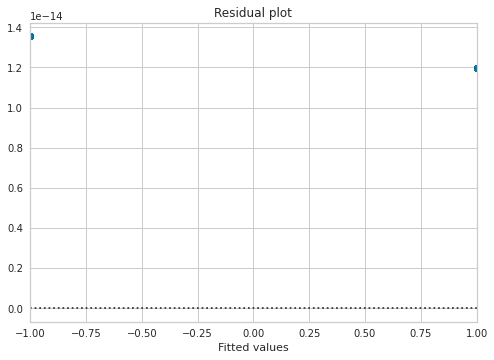

In [84]:
import seaborn as sns
sns.residplot(y_red_train_pred_no_outliers, x_red_train_no_outliers[ : , 0],lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')


#### Normal Q-Q

In [85]:
x= x_no_outliers
y=y_no_outliers

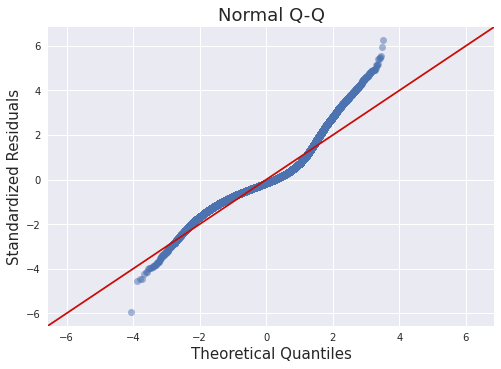

In [86]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

x= x_no_outliers
y=y_no_outliers

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

#### Scale-Location

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


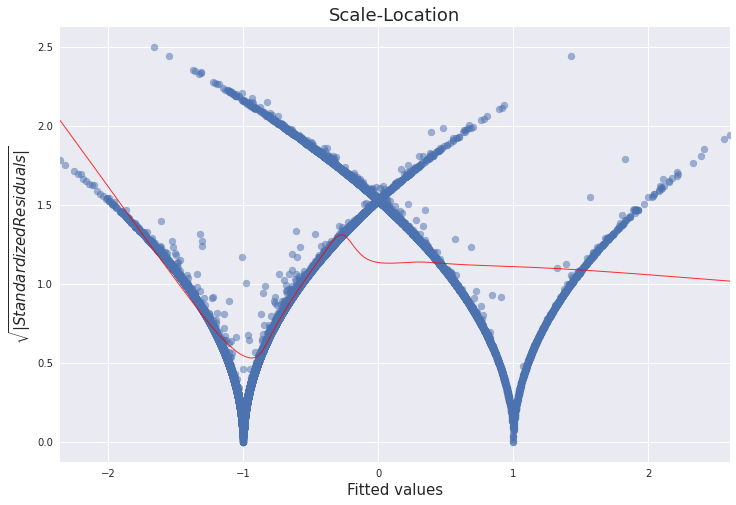

In [87]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

x= x_no_outliers
y=y_no_outliers

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

#### Residuals vs Leverage

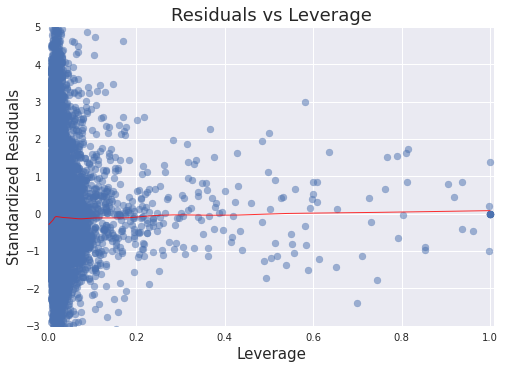

In [90]:

model_fit = model.fit()
model_cooks = model_fit.get_influence().cooks_distance[0]
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
model = sm.OLS(y_no_outliers, y_no_outliers)

#Residuals vs Leverage
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
x= x_no_outliers
y=y_no_outliers

leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
  plot_lm_4.axes[0].annotate(i,
                             xy=(model_leverage[i],
                                 model_norm_residuals[i]));

# Part 2 without the outliers

In [19]:

train_image1 = train['image'][0:20000, :]
train_image2 = train['image'][30000:40000, :]

train_image_no_outliers1 = np.concatenate((train_image1,train_image2),axis=0)
train_image3 = train['image'][50000:60000, :]
train_image_no_outliers = np.concatenate((train_image_no_outliers1,train_image3),axis=0)


train_label1 = train['label'][0:20000, ]
train_label2 = train['label'][30000:40000,]

train_label_no_outliers1 = np.concatenate((train_label1,train_label2),axis=0)
train_label3 = train['label'][50000:60000, ]
train_label_no_outliers = np.concatenate((train_label_no_outliers1,train_label3),axis=0)

test_image1 = test['image'][0:20000, :]
test_image2 = test['image'][30000:40000, :]

test_image_no_outliers1 = np.concatenate((test_image1,test_image2),axis=0)
test_image3 = test['image'][50000:60000, :]
test_image_no_outliers = np.concatenate((test_image_no_outliers1,test_image3),axis=0)

test_label1 = test['label'][0:20000, ]
test_label2 = test['label'][30000:40000, ]

test_label_no_outliers1 = np.concatenate((test_label1,test_label2),axis=0)
test_label3 = test['label'][50000:60000, ]
test_label_no_outliers = np.concatenate((test_label_no_outliers1,test_label3),axis=0)


#### Pick deux digits K and l of interest
Let K = 7 and l = 9


In [20]:
seven_no_outliers = []
not_seven_no_outliers = []
for i in range(len(train_label_no_outliers)):
    if 7 == train_label_no_outliers[i]:
        seven_no_outliers.append(i)
    else:
        not_seven_no_outliers.append(i)
print('lenght of seven indicies:',len(seven_no_outliers))
print('lenght of not seven indicies', len(not_seven_no_outliers))

lenght of seven indicies: 4201
lenght of not seven indicies 35799


In [21]:
nine_no_outliers = []
not_nine_no_outliers = []
for i in range(len(train_label_no_outliers)):
    if 9 == train_label_no_outliers[i]:
        nine_no_outliers.append(i)
    else:
        not_nine_no_outliers.append(i)
print('lenght of nine indicies:',len(nine_no_outliers))
print('lenght of not nine indicies', len(not_nine_no_outliers))

lenght of nine indicies: 3988
lenght of not nine indicies 36012


In [22]:
train_image_no_outliers[0].flatten().shape

(784,)

In [23]:
X_seven_no_outliers = np.zeros((len(seven_no_outliers), 784))
X_not_seven_no_outliers = np.zeros((len(not_seven_no_outliers), 784))

for i in range(len(seven_no_outliers)):
    X_seven_no_outliers[i] = train_image_no_outliers[seven_no_outliers[i]].flatten()
    
print(X_seven_no_outliers.shape)  

(4201, 784)


In [24]:
for i in range(len(not_seven_no_outliers)):
    X_not_seven_no_outliers[i] = train_image_no_outliers[not_seven_no_outliers[i]].flatten()
    
print(X_not_seven_no_outliers.shape)

(35799, 784)


In [25]:
X_nine_no_outliers = np.zeros((len(nine_no_outliers), 784))
X_not_nine_no_outliers = np.zeros((len(not_nine_no_outliers), 784))

for i in range(len(nine_no_outliers)):
    X_nine_no_outliers[i] = train_image_no_outliers[nine_no_outliers[i]].flatten()
    
print(X_nine_no_outliers.shape)  

(3988, 784)


In [26]:
for i in range(len(not_nine_no_outliers)):
    X_not_nine_no_outliers[i] = train_image_no_outliers[not_nine_no_outliers[i]].flatten()
    
print(X_not_nine_no_outliers.shape)

(36012, 784)


In [27]:
#create a pair of 7 and 9 digits
x_seven_nine_no_outliers = np.vstack([X_seven_no_outliers, X_nine_no_outliers])

In [28]:
#create a pair of not 7 and not 9 digits
x_not_seven_not_nine_no_outliers = np.vstack([X_not_seven_no_outliers, X_not_nine_no_outliers])

In [29]:
#add a column of 1's
x_7_9_no_outliers = np.hstack((np.ones((len(x_seven_nine_no_outliers),1)),x_seven_nine_no_outliers))
x_not_7_not_9_no_outliers = np.hstack((np.ones((len(x_not_seven_not_nine_no_outliers),1)),x_not_seven_not_nine_no_outliers))
print('x_7_9_no_outliers after adding 1s is:', x_7_9_no_outliers.shape)
print('x_not7_not_9_no_outliers after adding 1s is:', x_not_7_not_9_no_outliers.shape)

x_7_9_no_outliers after adding 1s is: (8189, 785)
x_not7_not_9_no_outliers after adding 1s is: (71811, 785)


In [30]:
#now let's concatenate x_7_9 and x_not_7_not_9
x79_no_outliers=np.concatenate((x_7_9_no_outliers,x_not_7_not_9_no_outliers), axis=0)
print(x_7_9_no_outliers.shape)

(8189, 785)


In [31]:
#building the matrix y
y_seven_nine_no_outliers = [1 for i in range(len(x_seven_nine_no_outliers))]
y_not7_not9_no_outliers = [-1 for i in range(len(x_not_seven_not_nine_no_outliers))]
print(len(y_seven_nine_no_outliers), len(y_not7_not9_no_outliers))

8189 71811


In [32]:
#concatenating y_two and y_not_two
y79_no_outliers=np.concatenate((y_seven_nine_no_outliers,y_not7_not9_no_outliers), axis=0)
print(y79_no_outliers.shape)

(80000,)


In [37]:

#import train test split
from sklearn.model_selection import train_test_split
x79_train_no_outliers, x79_test_no_outliers, y79_train_no_outliers, y79_test_no_outliers = train_test_split(x79_no_outliers, y79_no_outliers, test_size = 0.5, random_state = 42)


In [38]:
#display beta
beta79_no_outliers = np.linalg.pinv(x79_no_outliers.T@x79_no_outliers)@(x79_no_outliers.T@y79_no_outliers)
beta79_no_outliers

array([-8.13875782e-01, -5.47709434e-09, -7.49027475e-10,  8.62206456e-11,
        2.52493785e-10, -8.85080522e-10,  2.23679935e-09, -2.99180780e-10,
        1.31113298e-10, -2.81125186e-10, -6.51181064e-10,  8.86428410e-10,
       -2.95696692e-10,  1.91697395e-05, -1.11962077e-04, -1.71299493e-04,
       -7.13716957e-06, -2.30020052e-09, -7.72697635e-10, -8.26510336e-10,
        6.88739911e-10, -4.42864204e-11,  1.40975857e-09, -9.94193071e-11,
        8.06191411e-10, -4.12131745e-10,  8.21875069e-10,  1.08217666e-09,
        3.09981443e-10,  2.26947709e-10, -5.48011676e-10,  9.16543860e-10,
        6.41918940e-10,  3.09471731e-11, -1.48096569e-02, -2.10286668e-04,
       -6.25636518e-04, -3.95636777e-05,  1.35112898e-04,  2.12514320e-05,
       -5.60647618e-05, -4.93904769e-04,  4.30741506e-05, -6.10527553e-05,
       -1.97796313e-04, -9.16298693e-05, -5.06510574e-05,  7.85918924e-06,
       -3.13608574e-04,  3.86578835e-04, -8.35572979e-05, -1.70675245e-04,
        5.93529274e-06, -

In [39]:
beta79_no_outliers.shape

(785,)

#### Linear regression on the training set

In [40]:
#apply linear regression on the training set to predict y_train
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(x79_train_no_outliers, y79_train_no_outliers)
y79_train_pred_no_outliers = linearRegressor.predict(x79_train_no_outliers)
y79_train_pred_no_outliers = np.sign(y79_train_pred_no_outliers)
y79_train_pred_no_outliers

array([-1., -1., -1., ..., -1., -1., -1.])

#### classification report of the training set

In [41]:
#classification report
from sklearn.metrics import classification_report
report_no_outliers = classification_report(y79_train_no_outliers, y79_train_pred_no_outliers)
print(report_no_outliers)

              precision    recall  f1-score   support

          -1       0.91      0.98      0.95     35867
           1       0.52      0.20      0.29      4133

    accuracy                           0.90     40000
   macro avg       0.72      0.59      0.62     40000
weighted avg       0.87      0.90      0.88     40000



#### classification error rate of the training set

In [42]:
#classification error rate. accuracy rate is obtained from the classification report
accuracy79_no_outliers = 0.90
classification_error_rate79_no_outliers = 1 - accuracy79_no_outliers
classification_error_rate79_no_outliers

0.09999999999999998

#### Confusion matrix of the training set

In [43]:
from sklearn import metrics
print(metrics.confusion_matrix(y79_train_no_outliers, y79_train_pred_no_outliers))

[[35103   764]
 [ 3302   831]]


#### Linear regression on the test set

In [44]:
#apply linear regression on the test set to predict y_test
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(x79_test_no_outliers, y79_test_no_outliers)
y79_test_pred_no_outliers = linearRegressor.predict(x79_train_no_outliers)
y79_test_pred_no_outliers = np.sign(y79_train_pred_no_outliers)
y79_test_pred_no_outliers

array([-1., -1., -1., ..., -1., -1., -1.])

#### classification report of the test set

In [45]:
#classification report
from sklearn.metrics import classification_report
report79_no_outliers = classification_report(y79_test_no_outliers, y79_test_pred_no_outliers)
print(report79_no_outliers)

              precision    recall  f1-score   support

          -1       0.90      0.96      0.93     35944
           1       0.11      0.04      0.06      4056

    accuracy                           0.87     40000
   macro avg       0.50      0.50      0.49     40000
weighted avg       0.82      0.87      0.84     40000



#### classification error rate of the training set

In [46]:
#classification error rate. accuracy rate is obtained from the classification report
accuracy79_no_outliers = 0.87 
classification_error_rate79_no_outliers = 1 - accuracy79_no_outliers
classification_error_rate79_no_outliers

0.13

#### Confusion matrix of the training set

In [47]:

from sklearn import metrics
print(metrics.confusion_matrix(y79_test_no_outliers, y79_test_pred_no_outliers))

[[34520  1424]
 [ 3885   171]]


# Part 3 without outliers

In [91]:

from sklearn.model_selection import train_test_split
x_train_no_outliers, x_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(x_no_outliers, y_no_outliers, test_size = 0.5, random_state = 42)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [94]:
logisticRegr.fit(x_train_no_outliers, y_train_no_outliers)

/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [95]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test_no_outliers[0].reshape(1,-1))

array([-1])

In [96]:
#Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test_no_outliers[0:10])

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [97]:
#Make predictions on entire test data
predictions = logisticRegr.predict(x_test_no_outliers)

In [98]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test_no_outliers, y_test_no_outliers)
print(score)

0.96955


#### Confusion Matrix

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [147]:
# let's print the shape before we reshape and normalize
print("train_image shape", train['image'].shape)
print("train_label shape", train['label'].shape)
print("test_image shape",  test['image'].shape)
print("test_label shape", test['label'].shape)

# building the input vector from the 28x28 pixels
train['image'] = train['image'].reshape(60000, 784)
test['image'] = test['image'].reshape(10000, 784)
train['image'] = train['image'].astype('float32')
test['image'] = test['image'].astype('float32')

# normalizing the data to help with the training
train['image'] /= 255
test['image'] /= 255

# print the final input shape ready for training
print("Train matrix shape", train['image'].shape)
print("Test matrix shape", test['image'].shape)

train_image shape (60000, 28, 28)
train_label shape (60000,)
test_image shape (10000, 28, 28)
test_label shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [148]:
train_image1 = train['image'][0:20000, :]
train_image2 = train['image'][30000:40000, :]

train_image_no_outliers1 = np.concatenate((train_image1,train_image2),axis=0)
train_image3 = train['image'][50000:60000, :]
train_image_no_outliers = np.concatenate((train_image_no_outliers1,train_image3),axis=0)
train_image_no_outliers.shape


(40000, 784)

In [153]:
train_label1 = train['label'][0:20000, ]
train_label2 = train['label'][30000:40000,]

train_label_no_outliers1 = np.concatenate((train_label1,train_label2),axis=0)
train_label3 = train['label'][50000:60000, ]
train_label_no_outliers = np.concatenate((train_label_no_outliers1,train_label3),axis=0)
train_label_no_outliers.shape

(40000,)

In [149]:

test_image1 = test['image'][0:20000, :]
test_image2 = test['image'][30000:40000, :]

test_image_no_outliers1 = np.concatenate((test_image1,test_image2),axis=0)
test_image3 = test['image'][50000:60000, :]
test_image_no_outliers = np.concatenate((test_image_no_outliers1,test_image3),axis=0)
test_image_no_outliers.shape


(10000, 784)

In [165]:

test_label1 = test['label'][0:20000, ]
test_label2 = test['label'][30000:40000, ]

test_label_no_outliers1 = np.concatenate((test_label1,test_label2),axis=0)
test_label3 = test['label'][50000:60000, ]
test_label_no_outliers = np.concatenate((test_label_no_outliers1,test_label3),axis=0)
test_label_no_outliers.shape


(10000,)

In [150]:
#Import the model you want to use
from sklearn.linear_model import LogisticRegression
#Make an instance of the Model
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [154]:
#Training the model on the data, storing the information learned from the data
#Model is learning the relationship between digits and labels
logisticRegr.fit(train_image_no_outliers, train_label_no_outliers)

/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [155]:
# Predict the labels of new data (new images)

# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_image_no_outliers[0].reshape(1,-1))

array([7], dtype=uint8)

In [156]:

# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test_image_no_outliers[0:10])



array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [157]:
#shape
logisticRegr.coef_.shape
(10, 784)


(10, 784)

In [158]:
# prints weights for 8x8 image for class 0
logisticRegr.coef_[0].round(2)

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  , -0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  ,
       -0.  , -0.  , -0.  ,  0.07,  0.14,  0.06, -0.  ,  0.05,  0.15,
        0.07, -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.01,  0.  , -0.  , -0.  ,
       -0.  , -0.03, -0.05, -0.03, -0.04, -0.02, -0.07, -0.21, -0.24,
       -0.22, -0.18, -0.11, -0.05, -0.03, -0.02, -0.01, -0.01, -0.  ,
       -0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.02, -0.02, -0.16,
       -0.16, -0.21, -0.1 , -0.17,  0.03, -0.08, -0.2 , -0.06,  0.08,
        0.22,  0.41,  0.29, -0.25, -0.39, -0.23, -0.31, -0.18, -0.04,
        0.02,  0.01, -0.  ,  0.  ,  0.  ,  0.  , -0.  , -0.  , -0.03,
       -0.2 , -0.13, -0.  ,  0.19,  0.3 ,  0.23,  0.32,  0.03,  0.46,
        0.11,  0.3 ,

In [159]:
# Make predictions on entire test data
predictions = logisticRegr.predict(test_image_no_outliers)

In [160]:
#Train score
#accuracy is defined as:(fraction of correct predictions): correct predictions / total number of data points
score = logisticRegr.score(train_image_no_outliers, train_label_no_outliers)
print(score)

0.9395


In [166]:
#Test score
#accuracy is defined as:(fraction of correct predictions): correct predictions / total number of data points
score = logisticRegr.score(test_image_no_outliers, test_label_no_outliers)
print(score)

0.9238


#### Confusion Matrix

In [167]:
#Confusion Matrix
from sklearn import metrics
import seaborn as sns

cm = metrics.confusion_matrix(test_label_no_outliers, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized

array([[9.72448980e-01, 0.00000000e+00, 1.02040816e-03, 3.06122449e-03,
        0.00000000e+00, 1.12244898e-02, 7.14285714e-03, 4.08163265e-03,
        1.02040816e-03, 0.00000000e+00],
       [0.00000000e+00, 9.80616740e-01, 3.52422907e-03, 8.81057269e-04,
        0.00000000e+00, 1.76211454e-03, 2.64317181e-03, 1.76211454e-03,
        8.81057269e-03, 0.00000000e+00],
       [2.90697674e-03, 9.68992248e-03, 9.03100775e-01, 1.16279070e-02,
        7.75193798e-03, 4.84496124e-03, 1.16279070e-02, 5.81395349e-03,
        3.77906977e-02, 4.84496124e-03],
       [2.97029703e-03, 9.90099010e-04, 1.88118812e-02, 9.05940594e-01,
        1.98019802e-03, 2.37623762e-02, 1.98019802e-03, 1.08910891e-02,
        2.07920792e-02, 1.18811881e-02],
       [1.01832994e-03, 2.03665988e-03, 8.14663951e-03, 2.03665988e-03,
        9.22606925e-01, 0.00000000e+00, 1.01832994e-02, 5.09164969e-03,
        8.14663951e-03, 4.07331976e-02],
       [1.00896861e-02, 2.24215247e-03, 2.24215247e-03, 4.82062780e-02,
   

#### confusion matrix as a heatmap

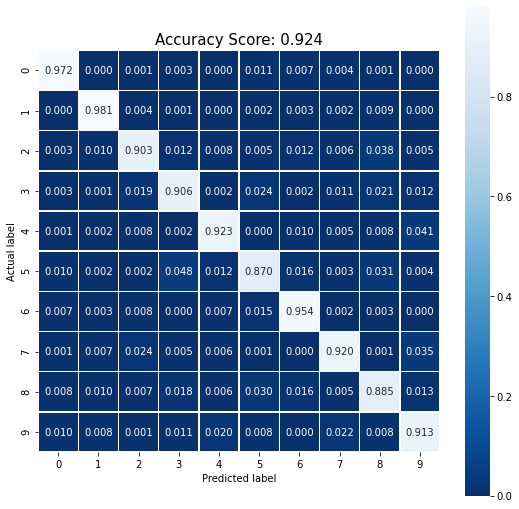

In [168]:
#confusion matrix (as a heatmap) of the entire dataset
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15);

#### Misclassified images with Predicted Labels

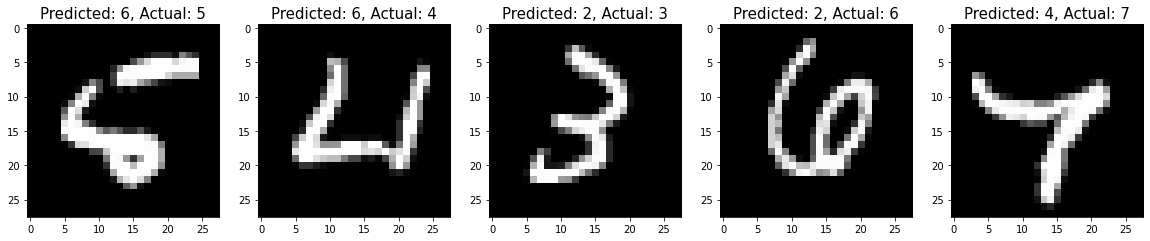

In [169]:
#Display Misclassified images with Predicted Labels to find which images are wrongly classified.
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_label_no_outliers, predictions): 
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
#print(misclassifiedIndexes)
plt.figure(figsize=(20,4))
#printthe 5 first misclassified images
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_image_no_outliers[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_label_no_outliers[badIndex]), fontsize = 15)

#### More samples

/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

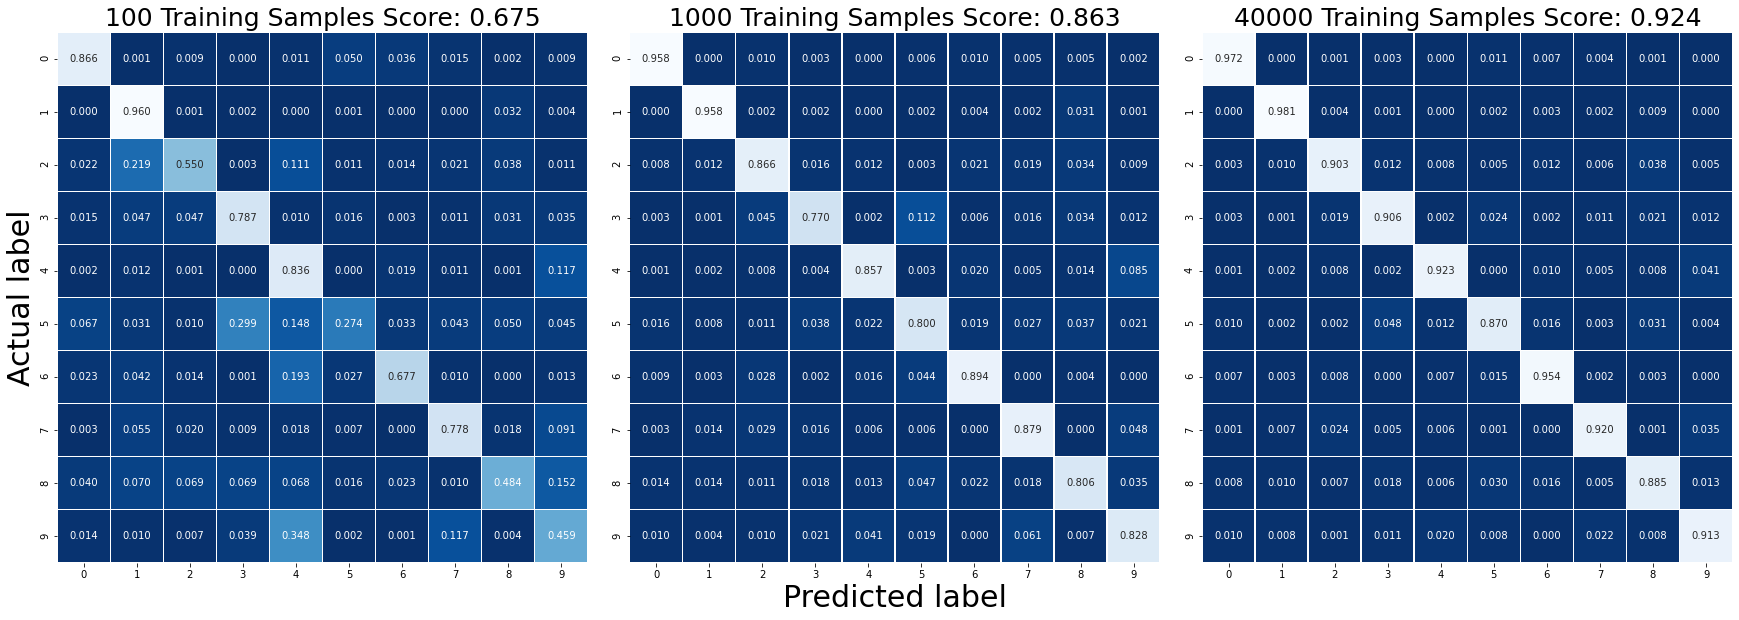

In [171]:
regr = LogisticRegression(solver = 'lbfgs')
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (24,8));
plt.tight_layout()

for plotIndex, sample_size in enumerate([100, 1000, 40000]):
    X_train = train_image_no_outliers[:sample_size].reshape(sample_size, 784)
    y_train = train_label_no_outliers[:sample_size]
    regr.fit(X_train, y_train)
    predicted = regr.predict(test_image_no_outliers)
    cm = metrics.confusion_matrix(test_label_no_outliers, predicted)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax = axes[plotIndex], cbar = False);
    accuracyString = '{:g} Training Samples Score: {:.3f}'.format(sample_size, regr.score(test_image_no_outliers, test_label_no_outliers)) 
    axes[plotIndex].set_title(accuracyString, size = 25);

axes[0].set_ylabel('Actual label', fontsize = 30);
axes[1].set_xlabel('Predicted label', fontsize = 30);